<a href="https://colab.research.google.com/github/nycerik/Data_201_Python/blob/main/ER_Python_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [237]:
#importing pandas and dataset
import pandas as pd

In [238]:
import numpy as np

In [239]:
import matplotlib.pyplot as plt

In [240]:
df=pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', index_col=False)

In [241]:
#The goal of this project is to analyze diabetes data
#View dataframe head, shape, info
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [242]:
df.shape

(101766, 50)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [244]:
#49 unique column names + index = 50
#determiining how many race types are used and if any values need replacing
df.groupby(['race'])['race'].count().sort_values(ascending = False)

race
Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [245]:
#determine gender types
df.groupby(['gender'])['gender'].count().sort_values(ascending = False)

gender
Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [246]:
#check for mising data
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [247]:
#drop unknown/invalid gender values
dfgender1 = df[(df['gender'] == 'Unknown/Invalid')].index

In [248]:
df.drop(dfgender1 , inplace=True)

In [249]:
#verify if Unknown/Invalid rows dropped
df.groupby(['gender'])['gender'].count().sort_values(ascending = False)

gender
Female    54708
Male      47055
Name: gender, dtype: int64

In [250]:
#rename race value of ? to unknown
df.loc[df['race'] == '?', 'race'] = 'unknown'

In [251]:
#verify if race = ? was replaced with unknown as the value
df.groupby(['race'])['race'].count().sort_values(ascending = False)

race
Caucasian          76099
AfricanAmerican    19210
unknown             2271
Hispanic            2037
Other               1505
Asian                641
Name: race, dtype: int64

In [252]:
#review race, gender, and number of lab procedures values only
dfrace_gender = df[['race', 'gender', 'num_lab_procedures']]


In [253]:
#confirm selection of columns
dfrace_gender.head()

,race,gender,num_lab_procedures
0,Caucasian,Female,41
1,Caucasian,Female,59
2,AfricanAmerican,Female,11
3,Caucasian,Male,44
4,Caucasian,Male,51


In [254]:
dfrace_gender.shape

(101763, 3)

In [255]:
#reviewing median lab procedures by race
dfrace_gender.groupby(['race'])['num_lab_procedures'].median()

race
AfricanAmerican    44.0
Asian              43.0
Caucasian          44.0
Hispanic           43.0
Other              44.0
unknown            45.0
Name: num_lab_procedures, dtype: float64

In [256]:
#reviewing median lab procedures by gender
dfrace_gender.groupby(['gender'])['num_lab_procedures'].median()

gender
Female    44.0
Male      44.0
Name: num_lab_procedures, dtype: float64

In [257]:
#creating subset on just one race
dfrace_gender2=dfrace_gender[df['race'] == 'Caucasian']

In [258]:
#verify subset
dfrace_gender2.shape

(76099, 3)

In [259]:
dfrace_gender2.head()

,race,gender,num_lab_procedures
0,Caucasian,Female,41
1,Caucasian,Female,59
3,Caucasian,Male,44
4,Caucasian,Male,51
5,Caucasian,Male,31


In [260]:
#sort column values
dfrace_gender.sort_values("race", ascending=False)

,race,gender,num_lab_procedures
75624,unknown,Male,80
29792,unknown,Female,37
29803,unknown,Female,1
95052,unknown,Male,10
78970,unknown,Male,54
...,...,...,...
27862,AfricanAmerican,Male,76
27866,AfricanAmerican,Female,69
71381,AfricanAmerican,Female,68
27869,AfricanAmerican,Female,45


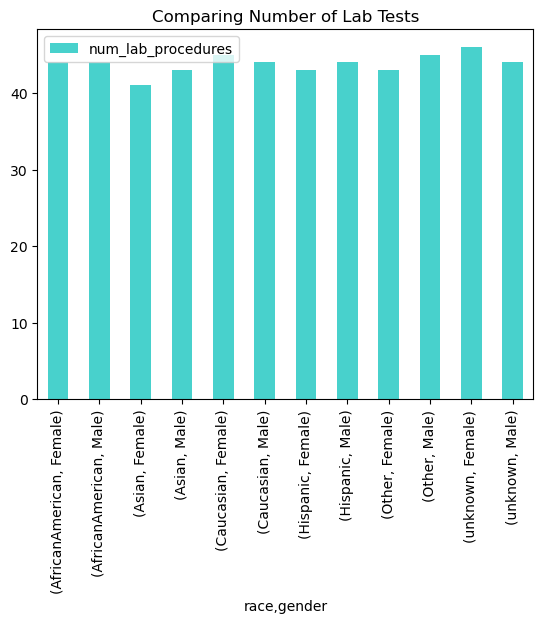

In [261]:
#new subset for visualization including other race values
dfrace_gender2_viz = dfrace_gender.groupby(['race', 'gender']).median().plot(kind="bar", title = 'Comparing Number of Lab Tests',color=["#48D1CC", "#9ACD32"])

In [262]:
#changed subset for lab procedures vs procedures - too small of variation
dfrace_gender1=dfrace_gender[['race','gender','num_lab_procedures']]

Text(0, 0.5, 'Number of Lab Tests Performed')

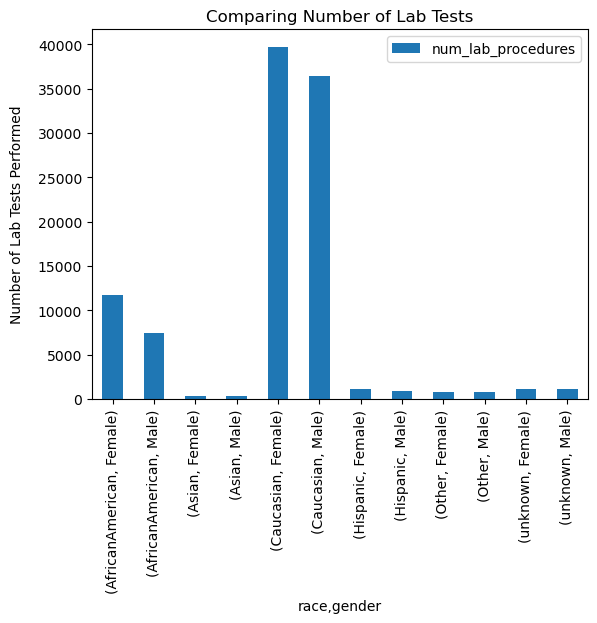

In [263]:
#visualization of average lab test procedures by race and gender.  Trying to change colors, borrowing from github
dfrace_gender1_graph=dfrace_gender1.groupby(['race', 'gender']).count().plot(kind="bar", title = 'Comparing Number of Lab Tests')
dfrace_gender1_graph.set_ylabel('Number of Lab Tests Performed', labelpad=10)


Text(0, 0.5, 'Number of Lab Tests Performed')

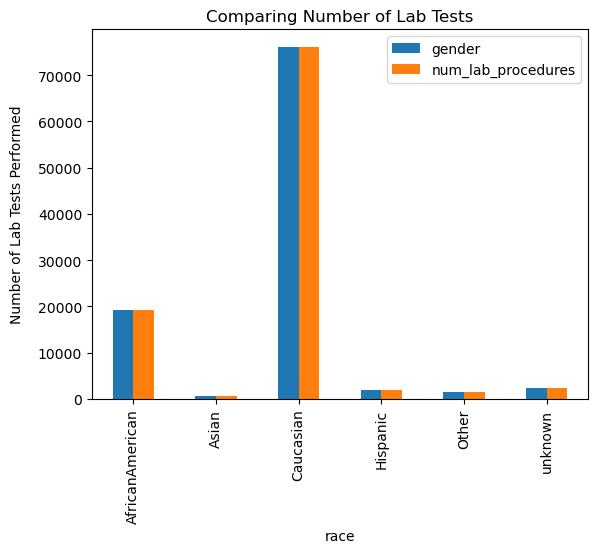

In [264]:
#try to visualize by race only
dfrace_gender1_graph=dfrace_gender1.groupby(['race']).count().plot(kind="bar", title = 'Comparing Number of Lab Tests')
dfrace_gender1_graph.set_ylabel('Number of Lab Tests Performed', labelpad=10)

Text(0, 0.5, 'Number of Lab Tests Performed')

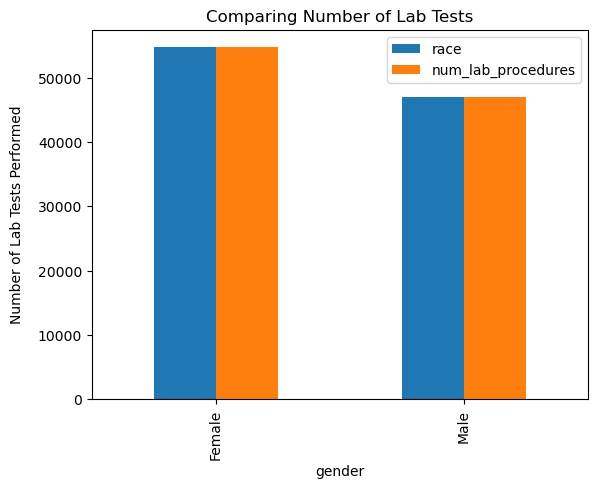

In [265]:
#try to visualize by gender only
dfrace_gender1_graph=dfrace_gender1.groupby(['gender']).count().plot(kind="bar", title = 'Comparing Number of Lab Tests')
dfrace_gender1_graph.set_ylabel('Number of Lab Tests Performed', labelpad=10)

Conclusion:
A review of diabetes data from The Centers for Disease Control and Prevention (“CDC”) was filtered to examine the number of lab testing procedures conducted per patient, by race and then by gender. An overwhelming number of tests were conducted upon Caucasian patients, and of that subset, more tests were conducted upon Caucasian females than males.

In [267]:








#playing with seaborn
import seaborn as sns

In [268]:
#not sure what this is but was suggested on https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly
import timeit

In [269]:
#in an earlier dataframe, i tried breaking out by one race at a time vs. all but it was not visually useful but since the df existed, i am playing with them
dfrace_gender2=dfrace_gender[df['race'] == 'Caucasian']

In [270]:
dfrace_gender3=dfrace_gender[df['race'] == 'AfricanAmerican']

In [271]:
#creating and labeling the legend and stipulating what values would appear within
dfrace_gender2['Legend']='Caucasian'
dfrace_gender3['Legend']='AfricanAmerican'

C:\Users\ornob\AppData\Local\Temp\ipykernel_6808\2534015127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrace_gender2['Legend']='Caucasian'
C:\Users\ornob\AppData\Local\Temp\ipykernel_6808\2534015127.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrace_gender3['Legend']='AfricanAmerican'


In [272]:
#concatenating or merging the two df's
res=pd.concat([dfrace_gender2, dfrace_gender3])

<Axes: xlabel='race', ylabel='num_lab_procedures'>

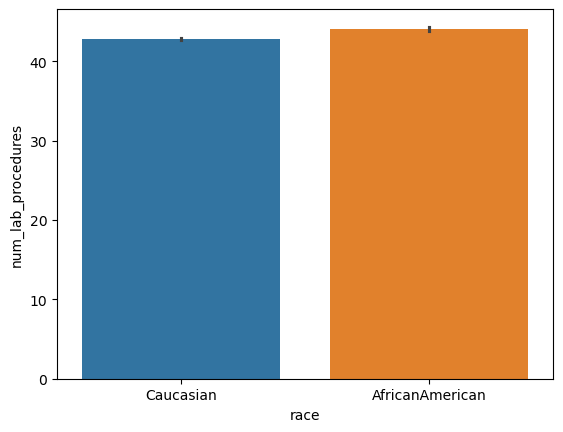

In [273]:
#defining the axes in seaborn.  received error messages when x/y labels were reversed
sns.barplot(x='race',y='num_lab_procedures',data=res,hue='Legend')

<Axes: xlabel='gender', ylabel='num_lab_procedures'>

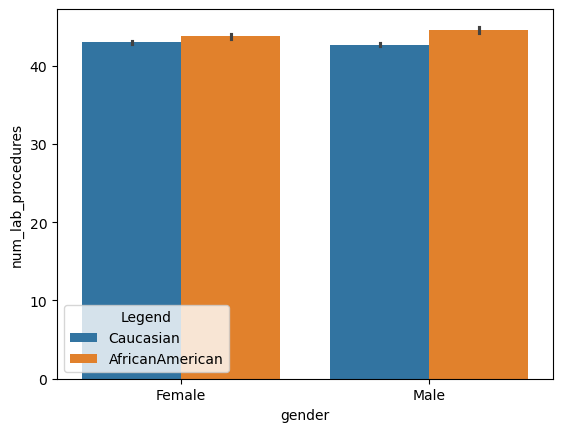

In [274]:
#flipping the y axis - df's were concatenated but do not appear next to each other
sns.barplot(x='gender',y='num_lab_procedures',data=res,hue='Legend')